# Regression

Regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. It aims to find the best fitting line (or curve) that describes the relationship between the variables.

### Linear Regression

Linear Regression is a statistical method used to establish a relationship between a dependent variable and one or more independent variables. In the case of simple linear regression, there is only one independent variable, whereas in multiple linear regression, there are multiple independent variables.

The objective of linear regression is to find a linear relationship between the dependent variable and the independent variable(s) that can be used to predict the values of the dependent variable for new data points.

In a linear regression model, the relationship between the dependent variable and independent variable(s) is represented by a linear equation, where the coefficients of the equation are estimated using a training dataset. Once the coefficients are estimated, the model can be used to predict the values of the dependent variable for new data points.



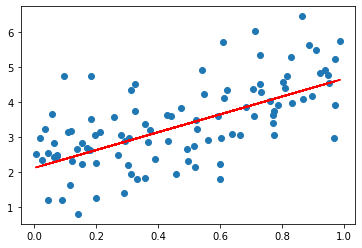

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 3*X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualize data and regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()


Once you have trained a LinearRegression model on your data, you can use it to make predictions on new data. The model will output a predicted value for the dependent variable based on the values of the independent variables.

In [12]:
# Make predictions on new data
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)


Predicted values: [[4.09263268]
 [2.28858277]
 [4.32672714]
 [2.19136093]
 [3.99251202]
 [2.31531372]
 [2.63311638]
 [2.91929865]
 [3.33030152]
 [4.59816157]
 [2.4376556 ]
 [4.10247864]
 [4.17146869]
 [3.9864253 ]
 [2.37554319]
 [2.59778232]
 [2.52427607]
 [2.17903682]
 [4.64226741]
 [3.71543225]]


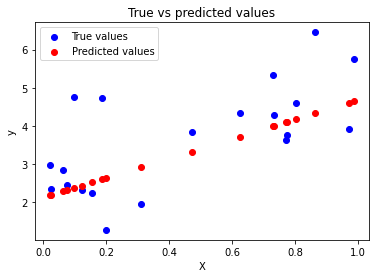

In [13]:
# Plot predicted and true values for test data
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs predicted values')
plt.legend()
plt.show()

To calculate the error between the predicted and test values, you can use a variety of metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). 

In [14]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 1.170861925219628


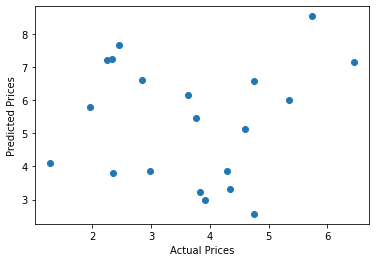

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

#### Other Evaluation Metrics

R-squared (or the coefficient of determination) is a statistical measure that represents the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model. It is a value between 0 and 1, with higher values indicating a better fit of the model to the data.

More specifically, R-squared is calculated as the ratio of the explained variance to the total variance:

R-squared = explained variance / total variance

The explained variance is the variance in the dependent variable that is accounted for by the independent variables in the model. The total variance is the variance in the dependent variable that is not accounted for by the model, and represents the variation that is due to factors other than the independent variables.

R-squared is an important metric for evaluating the performance of a regression model. A high value of R-squared indicates that the model is able to explain a large proportion of the variation in the dependent variable, which suggests that it is a good fit for the data. However, it is important to note that a high value of R-squared does not necessarily mean that the model is a good predictor of future values, or that the model is free from other problems such as overfitting or multicollinearity. Therefore, it is often used in conjunction with other evaluation metrics to assess the performance of a regression model.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.3461837802973725


### Multivariable Regression

Multivariable regression, also known as multiple linear regression, is a type of regression analysis that involves more than one independent variable. It is an extension of simple linear regression, which only considers one independent variable.

In multivariable regression, the goal is to find the best linear relationship between a dependent variable and two or more independent variables. The relationship can be represented by the following equation:

y = b0 + b1x1 + b2x2 + ... + bn*xn

where:

y is the dependent variable
x1, x2, ..., xn are the independent variables
b0, b1, b2, ..., bn are the coefficients of the independent variables

The coefficients represent the effect of each independent variable on the dependent variable, while holding all other independent variables constant.

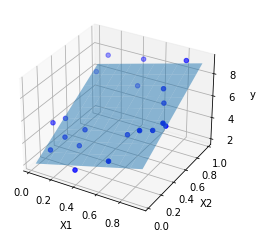

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 2 + 3*X1 + 4*X2 + np.random.randn(100, 1)

# Train/test split
X = np.hstack((X1, X2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='b', marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# Overlay predicted plane on top of scatter plot
x1_grid, x2_grid = np.meshgrid(np.linspace(X_test[:,0].min(), X_test[:,0].max(), 10), 
                               np.linspace(X_test[:,1].min(), X_test[:,1].max(), 10))
X_grid = np.hstack((x1_grid.reshape(-1,1), x2_grid.reshape(-1,1)))
y_grid = model.predict(X_grid).reshape(x1_grid.shape)
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)

# Show plot
plt.show()


In [17]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.6664320988651887


In [18]:
# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.7930246604696525


### Polynomial Regression